Consider the following dataset ‘Churn_Modelling.csv’:
The dataset has 14 features :
• RowNumber:- Represents the number of rows

• CustomerId:- Represents customerId
    
• Surname:- Represents surname of the customer
    
• CreditScore:- Represents credit score of the customer
    
• Geography:- Represents the city to which customers belongs to
    
• Gender:- Represents Gender of the customer
    
• Age:- Represents age of the customer
    
• Tenure:- Represents tenure of the customer with a bank
    
• Balance:- Represents balance hold by the customer
    
• NumOfProducts:- Represents the number of bank services used by the customer
    
• HasCrCard:- Represents if a customer has a credit card or not
    
• IsActiveMember:- Represents if a customer is an active member or not
    
• EstimatedSalary:- Represents estimated salary of the customer
    
• Exited:- Represents if a customer is going to exit the bank or not.
    
1. Perform the required pre-processing and write comment lines to explain the pre-processing
steps.

2. Perform experiments using (70,15,15) split and tabulate the performance in terms of Accuracy,
Precision & Recall for the following experimental setup:
    
a) Number of Hidden Layers and Number of Units per Layer
Number of Hidden Layers           Number of Units
1                                   128, 0 ,0
2                                   128, 64, 0
3                                   128, 64, 32

b) Epochs (10,20,30)

c) Activation function (Sigmoid, ReLU )

d) Without Regularization, with Regularization (L1/L2)

e) Learning rate (0.1, 0.01,0.001)

f) Visualize the training and validation loss against the epochs and comment on optimal
hyperparameters.

In [1]:
#libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler, LabelEncoder



ModuleNotFoundError: No module named 'tensorflow'

In [3]:
d = pd.read_csv('/content/Churn_Modelling.csv')
d.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:

d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Data Cleannig
#Drop unwanted columns
d.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
d.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
d.shape

(10000, 11)

In [7]:
num_samples=d.shape[0]
num_features=d.shape[1]
num_class=1

In [8]:
le = LabelEncoder()
d['Gender'] = le.fit_transform(d['Gender'])
d['Geography'] = le.fit_transform(d['Geography'])
d.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
X = d.drop(columns=['Exited']) # Exclude Percent Body Fat columns
y = d['Exited']# Percent Body Fat column

In [10]:
# Generate random input data (features)
from sklearn.model_selection import train_test_split
# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [13]:
def build_model(hidden_layers, units_per_layer, activation_function, regularization_type, learning_rate):
    model = tf.keras.models.Sequential()
    # Add input layer
    model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Add hidden layers
    for i in range(hidden_layers):
        if regularization_type == 'L1':
            model.add(tf.keras.layers.Dense(units_per_layer[i], activation=activation_function, kernel_regularizer=tf.keras.regularizers.l1()))
        elif regularization_type == 'L2':
            model.add(tf.keras.layers.Dense(units_per_layer[i], activation=activation_function, kernel_regularizer=tf.keras.regularizers.l2()))
        else:
            model.add(tf.keras.layers.Dense(units_per_layer[i], activation=activation_function))

    # Add output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [14]:
def train_and_evaluate_model(model, epochs):
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=0)
    # Evaluate the model on the test set
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall, history

In [15]:
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [16]:
experiments = [
    {'hidden_layers': 1, 'units_per_layer': [128, 0, 0], 'epochs': 10, 'activation_function': 'sigmoid', 'regularization_type': None, 'learning_rate': 0.1},
    {'hidden_layers': 2, 'units_per_layer': [128, 64, 0], 'epochs': 20, 'activation_function': 'sigmoid', 'regularization_type': None, 'learning_rate': 0.01},
    {'hidden_layers': 3, 'units_per_layer': [128, 64, 32], 'epochs': 30, 'activation_function': 'sigmoid', 'regularization_type': None, 'learning_rate': 0.001},
     {'hidden_layers': 1, 'units_per_layer': [128, 0, 0], 'epochs': 10, 'activation_function': 'relu', 'regularization_type': None, 'learning_rate': 0.1},
    {'hidden_layers': 2, 'units_per_layer': [128, 64, 0], 'epochs': 20, 'activation_function': 'relu', 'regularization_type': None, 'learning_rate': 0.01},
    {'hidden_layers': 3, 'units_per_layer': [128, 64, 32], 'epochs': 30, 'activation_function': 'relu', 'regularization_type': None, 'learning_rate': 0.001},
]

results = []

47/47 [==============================] - 0s 859us/step


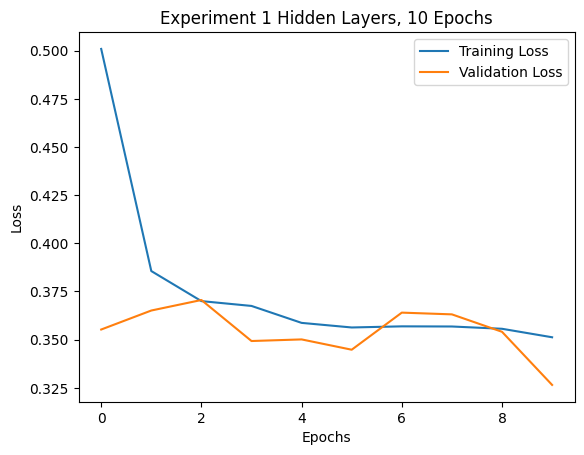

47/47 [==============================] - 0s 835us/step


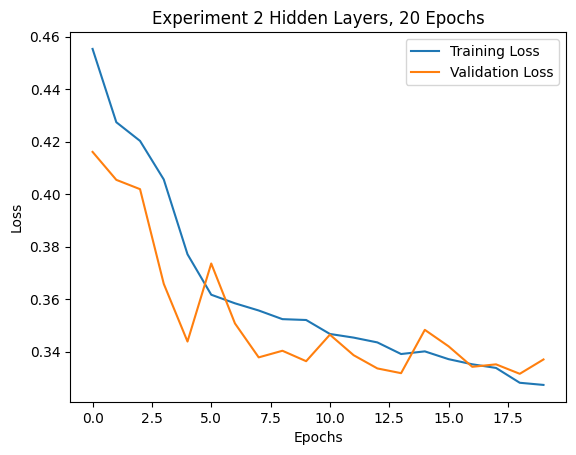

47/47 [==============================] - 0s 914us/step


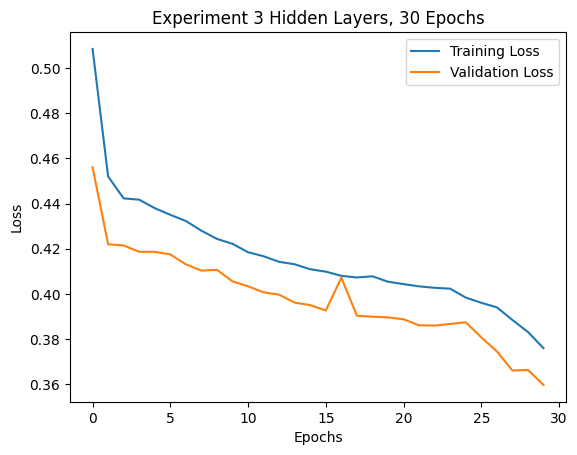

47/47 [==============================] - 0s 838us/step


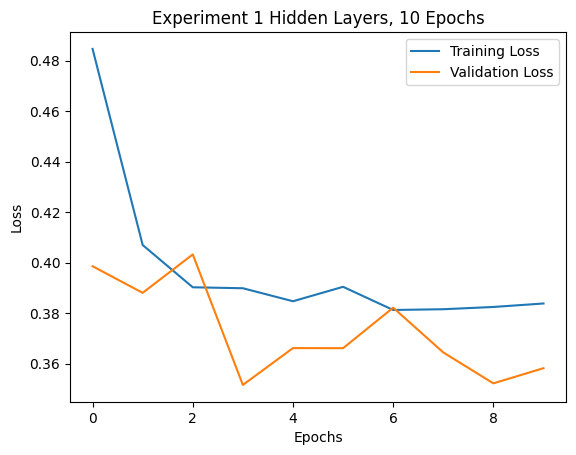

47/47 [==============================] - 0s 852us/step


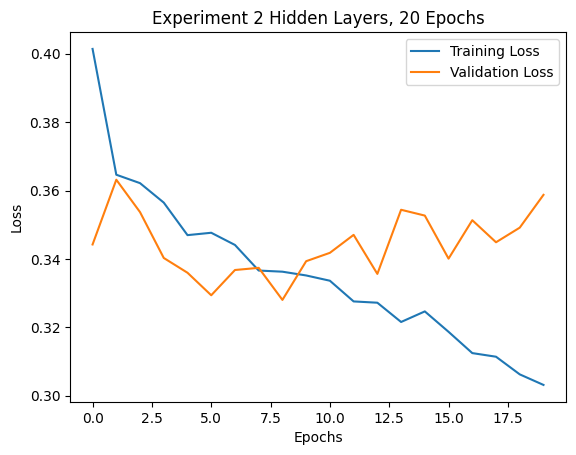

47/47 [==============================] - 0s 968us/step


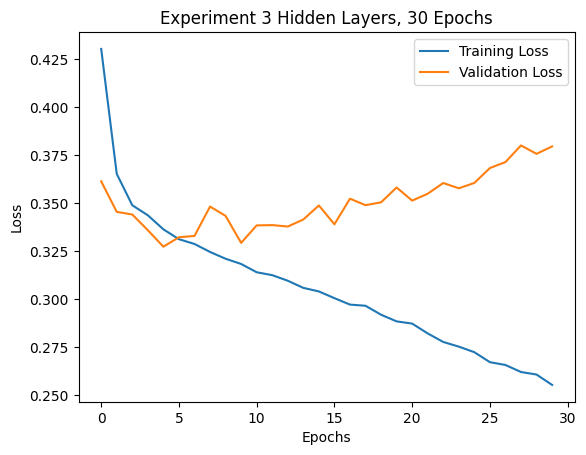

In [17]:
for exp in experiments:
    model = build_model(exp['hidden_layers'], exp['units_per_layer'], exp['activation_function'], exp['regularization_type'], exp['learning_rate'])
    accuracy, precision, recall, history = train_and_evaluate_model(model, exp['epochs'])
    results.append({'Experiment': exp, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'History': history})

    # Plot loss for each experiment
    plot_loss(history, f"Experiment {exp['hidden_layers']} Hidden Layers, {exp['epochs']} Epochs")

In [18]:
# Print or visualize the results and comment on optimal hyperparameters
for result in results:
    print(f"Experiment: {result['Experiment']}")
    print(f"Accuracy: {result['Accuracy']:.4f}, Precision: {result['Precision']:.4f}, Recall: {result['Recall']:.4f}")
    print("-" * 50)

Experiment: {'hidden_layers': 1, 'units_per_layer': [128, 0, 0], 'epochs': 10, 'activation_function': 'sigmoid', 'regularization_type': None, 'learning_rate': 0.1}
Accuracy: 0.8573, Precision: 0.7216, Recall: 0.4667
--------------------------------------------------
Experiment: {'hidden_layers': 2, 'units_per_layer': [128, 64, 0], 'epochs': 20, 'activation_function': 'sigmoid', 'regularization_type': None, 'learning_rate': 0.01}
Accuracy: 0.8633, Precision: 0.7230, Recall: 0.5133
--------------------------------------------------
Experiment: {'hidden_layers': 3, 'units_per_layer': [128, 64, 32], 'epochs': 30, 'activation_function': 'sigmoid', 'regularization_type': None, 'learning_rate': 0.001}
Accuracy: 0.8567, Precision: 0.7179, Recall: 0.4667
--------------------------------------------------
Experiment: {'hidden_layers': 1, 'units_per_layer': [128, 0, 0], 'epochs': 10, 'activation_function': 'relu', 'regularization_type': None, 'learning_rate': 0.1}
Accuracy: 0.8653, Precision: 0.9